In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [22]:
# Load and preprocess the dataset
# Replace 'your_dataset.csv' with the path to your dataset
df = pd.read_csv('new_dataset.csv')

In [23]:
numeric_data = df.select_dtypes(exclude='object')

In [24]:
df.dropna(inplace=True)

In [25]:
# Split dataset into features and target variable
X = numeric_data.drop(columns=['is_insider']).values
y = numeric_data['is_insider'].values


In [26]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
# Reshape features for LSTM input (assuming your data has a single feature)
# LSTM input shape: (samples, time_steps, features)
X_train_lstm = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

In [29]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
from keras.optimizers import Adam

# Compile the model
optimizer = Adam(learning_rate=0.001)  # Specify the learning rate parameter
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
# Train the model
history = model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.5315 - loss: 0.6939 - val_accuracy: 0.6356 - val_loss: 0.6864
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6171 - loss: 0.6837 - val_accuracy: 0.6311 - val_loss: 0.6792
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6222 - loss: 0.6761 - val_accuracy: 0.6267 - val_loss: 0.6737
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6285 - loss: 0.6679 - val_accuracy: 0.6178 - val_loss: 0.6700
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6395 - loss: 0.6568 - val_accuracy: 0.6178 - val_loss: 0.6665
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6084 - loss: 0.6642 - val_accuracy: 0.6222 - val_loss: 0.6643
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6458 - loss: 0.6441 - val_accuracy: 0.6222 - val_loss: 0.6631
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6070 - loss: 0.6558 - val_accuracy: 0.6178 - val_loss

In [33]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_lstm, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6104 - loss: 0.6605 
Test Accuracy: 62.63%


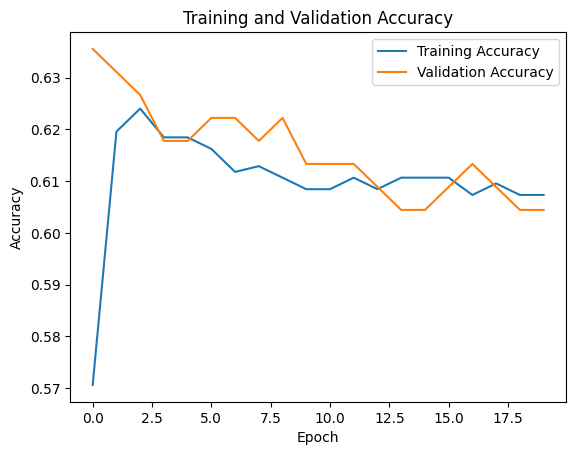

In [34]:
# Optionally, you can plot training history to visualize training/validation accuracy and loss over epochs
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()